### Importing all the basic library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Importing the Kepler DataSet

In [3]:
df = pd.read_csv('dataset/cumulative.csv')

#Display all the rows and columns upto 100 observation
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

### Data Insights & EDA

In [4]:
# Printing the shape of the train and test dataset

print(df.shape)
print('The shape of train data is: Row {} columns {}'.format(df.shape[0],df.shape[1]))

(9564, 50)
The shape of train data is: Row 9564 columns 50


In [ ]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


The Kepler space telescope is a retired space telescope launched by NASA in 2009 to discover Earth-size planets orbiting other stars. We can download the data recorded by Kepler from Exoplanet Archive. The NASA Exoplanet Archive is an online astronomical exoplanet and stellar catalog. Kepler Identifies the KOI (Kepler Object of Interest and made a comprehensive analysis to disposition them into planet candidates and false positives.

### Let us rename the features for a better understanding.

In [6]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'Exoplanet_Archive_Disposition',
'koi_pdisposition':'Disposition_Using_KeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit_LikeFPFlag',
'koi_fpflag_ss':'StellarEclipse_FP_Flag',
'koi_fpflag_co':'CentroidOffsetFPFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFPFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpper_days',
'koi_period_err2':'OrbitalPeriodLower_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpoch_Lower',
'koi_time0bk_err2':'TransitEpoch_Upper',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameter_Lower',
'koi_impact_err2':'ImpactParameter_Upper',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDuration_Lower',
'koi_duration_err2':'TransitDuration_Upper',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepth_Lower',
'koi_depth_err2':'TransitDepth_Upper',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadius_Lower',
'koi_prad_err2':'PlanetaryRadius_Upper',
'koi_teq':'EquilibriumTemperature_K',
'koi_teq_err1':'EquilibriumTemperature_Lower',
'koi_teq_err2':'EquilibriumTemperature_Upper',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFlux_Lower',
'koi_insol_err2':'InsolationFlux_Upper',
'koi_model_snr':'TransitSignal_to_Noise',
'koi_tce_plnt_num':'TCE_PlanetNumber',
'koi_tce_delivname':'TCE_DeliverName',
'koi_steff':'StellarEffectiveTemperature_K',
'koi_steff_err1':'StellarEffectiveTemp_Lower',
'koi_steff_err2':'StellarEffectiveTemp_Upper',
'koi_slogg':'StellarSurfaceGravity',
'koi_slogg_err1':'Stellar_SurfaceGravity_Lower',
'koi_slogg_err2':'Stellar_SurfaceGravity_Upper',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadius_Lower',
'koi_srad_err2':'StellarRadius_Upper',
'ra':'RA_deg',
'dec':'Dec_deg',
'koi_kepmag':'Kepler_band[mag]'
})

In [7]:
df.head()

,rowid,KepID,KOIName,KeplerName,Exoplanet_Archive_Disposition,Disposition_Using_KeplerData,DispositionScore,NotTransit_LikeFPFlag,StellarEclipse_FP_Flag,CentroidOffsetFPFlag,EphemerisMatchIndicatesContaminationFPFlag,OrbitalPeriod_days,OrbitalPeriodUpper_days,OrbitalPeriodLower_days,TransitEpoch_BKJD,TransitEpoch_Lower,TransitEpoch_Upper,ImpactParamete,ImpactParameter_Lower,ImpactParameter_Upper,TransitDuration_hrs,TransitDuration_Lower,TransitDuration_Upper,TransitDepth_ppm,TransitDepth_Lower,TransitDepth_Upper,PlanetaryRadius_Earthradii,PlanetaryRadius_Lower,PlanetaryRadius_Upper,EquilibriumTemperature_K,EquilibriumTemperature_Lower,EquilibriumTemperature_Upper,InsolationFlux_Earthflux,InsolationFlux_Lower,InsolationFlux_Upper,TransitSignal_to_Noise,TCE_PlanetNumber,TCE_DeliverName,StellarEffectiveTemperature_K,StellarEffectiveTemp_Lower,StellarEffectiveTemp_Upper,StellarSurfaceGravity,Stellar_SurfaceGravity_Lower,Stellar_SurfaceGravity_Upper,StellarRadius_Solarradii,StellarRadius_Lower,StellarRadius_Upper,RA_deg,Dec_deg,Kepler_band[mag]
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rowid                                       9564 non-null   int64  
 1   KepID                                       9564 non-null   int64  
 2   KOIName                                     9564 non-null   object 
 3   KeplerName                                  2294 non-null   object 
 4   Exoplanet_Archive_Disposition               9564 non-null   object 
 5   Disposition_Using_KeplerData                9564 non-null   object 
 6   DispositionScore                            8054 non-null   float64
 7   NotTransit_LikeFPFlag                       9564 non-null   int64  
 8   StellarEclipse_FP_Flag                      9564 non-null   int64  
 9   CentroidOffsetFPFlag                        9564 non-null   int64  
 10  EphemerisMat

Comments:
This info reflects that there are some null values and few are completely empty ('EquilibriumTemperature_err1','EquilibriumTemperature_err2') so we can just remove them.
And most of the features are numerical so let's first look the cate gorical features in breif.

### Handling Missing Values

In [9]:
#Checking for missing values

df.isnull().sum()

rowid                                            0
KepID                                            0
KOIName                                          0
KeplerName                                    7270
Exoplanet_Archive_Disposition                    0
Disposition_Using_KeplerData                     0
DispositionScore                              1510
NotTransit_LikeFPFlag                            0
StellarEclipse_FP_Flag                           0
CentroidOffsetFPFlag                             0
EphemerisMatchIndicatesContaminationFPFlag       0
OrbitalPeriod_days                               0
OrbitalPeriodUpper_days                        454
OrbitalPeriodLower_days                        454
TransitEpoch_BKJD                                0
TransitEpoch_Lower                             454
TransitEpoch_Upper                             454
ImpactParamete                                 363
ImpactParameter_Lower                          454
ImpactParameter_Upper          

Comments:
We can drop the features 'EquilibriumTemperature_err1','EquilibriumTemperature_err2','KeplerName' as most of the values are missing.
we can impute other null values with mean.

In [10]:
df['TCE_DeliverName'].value_counts()

TCE_DeliverName
q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: count, dtype: int64

Comments:
We can see that the column 'TCE_DeliverName' has almost all the values assigned to a single category so it is not going to contribute much in model training so we gonna drop it.

In [11]:
df.drop(columns=['EquilibriumTemperature_Lower','EquilibriumTemperature_Upper','KeplerName','TCE_DeliverName'],inplace=True)

In [12]:
#Separiting the categorical features

categorical= df.select_dtypes(include =[object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

Categorical Features in DataSet: 3
Index(['KOIName', 'Exoplanet_Archive_Disposition',
       'Disposition_Using_KeplerData'],
      dtype='object')


In [13]:
# Filling the null values of numerical features with the respective mean

numerical=df.select_dtypes(include =[np.float64, np.int64])

from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy='mean')
df_numerical=imputer.fit_transform(numerical)

df_numerical=pd.DataFrame(df_numerical,columns=numerical.columns)

Let's now concatenate the both numerical and categorical data

In [14]:
df= pd.concat([df_numerical,categorical],axis=1)

In [15]:
df.head()

,rowid,KepID,DispositionScore,NotTransit_LikeFPFlag,StellarEclipse_FP_Flag,CentroidOffsetFPFlag,EphemerisMatchIndicatesContaminationFPFlag,OrbitalPeriod_days,OrbitalPeriodUpper_days,OrbitalPeriodLower_days,TransitEpoch_BKJD,TransitEpoch_Lower,TransitEpoch_Upper,ImpactParamete,ImpactParameter_Lower,ImpactParameter_Upper,TransitDuration_hrs,TransitDuration_Lower,TransitDuration_Upper,TransitDepth_ppm,TransitDepth_Lower,TransitDepth_Upper,PlanetaryRadius_Earthradii,PlanetaryRadius_Lower,PlanetaryRadius_Upper,EquilibriumTemperature_K,InsolationFlux_Earthflux,InsolationFlux_Lower,InsolationFlux_Upper,TransitSignal_to_Noise,TCE_PlanetNumber,StellarEffectiveTemperature_K,StellarEffectiveTemp_Lower,StellarEffectiveTemp_Upper,StellarSurfaceGravity,Stellar_SurfaceGravity_Lower,Stellar_SurfaceGravity_Upper,StellarRadius_Solarradii,StellarRadius_Lower,StellarRadius_Upper,RA_deg,Dec_deg,Kepler_band[mag],KOIName,Exoplanet_Archive_Disposition,Disposition_Using_KeplerData
0,1.0,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,K00752.01,CONFIRMED,CANDIDATE
1,2.0,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,K00752.02,CONFIRMED,CANDIDATE
2,3.0,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,K00753.01,FALSE POSITIVE,FALSE POSITIVE
3,4.0,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,K00754.01,FALSE POSITIVE,FALSE POSITIVE
4,5.0,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,K00755.01,CONFIRMED,CANDIDATE


### Now let's determine the target variable to set the objective of this project.

#### 'Exoplanet_Archive_Disposition' and 'Disposition_Using_KeplerData' are the two important feature that could be our output variable.

1. Exoplanet_Archive_Disposition

In [16]:
df['Exoplanet_Archive_Disposition'].value_counts()

Exoplanet_Archive_Disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Exoplanet_Archive_Disposition'>

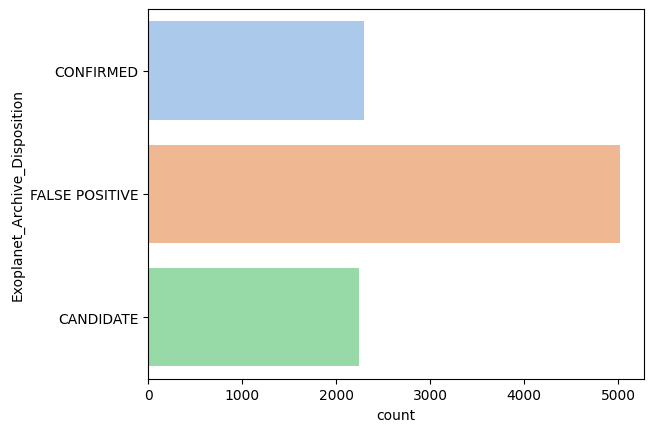

In [17]:
sns.countplot(df['Exoplanet_Archive_Disposition'],palette='pastel')

2. Disposition_Using_KeplerData

In [18]:
df['Disposition_Using_KeplerData'].value_counts()

Disposition_Using_KeplerData
FALSE POSITIVE    5068
CANDIDATE         4496
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Disposition_Using_KeplerData'>

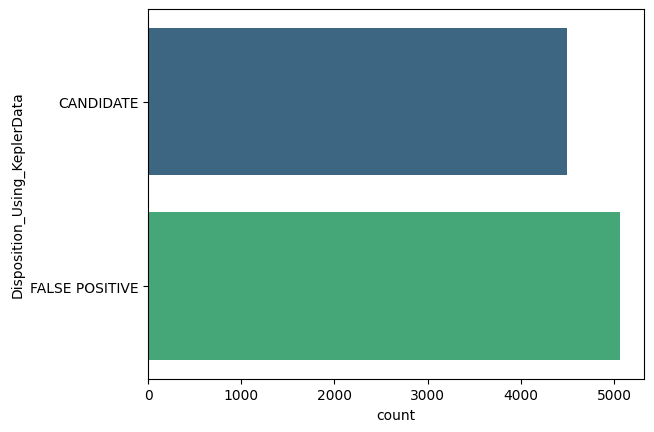

In [19]:
sns.countplot(df['Disposition_Using_KeplerData'],palette='viridis')

### Comments:
 
- This feature represents the disposition done by the analysis of Kepler data. And it could be either False Positive or Candidate.

- We will now explore a bit more about the features that contributes to disposition an exoplanet Candidates from the Kepler Data.¶
- AS we know that Kepler's objective is to study the structure and diversity of the planetary system by using transit method. So Now we will focus on the Transit properties to identify the exoplanets.

In [21]:
Candidate = df[df.Disposition_Using_KeplerData == 'CANDIDATE']

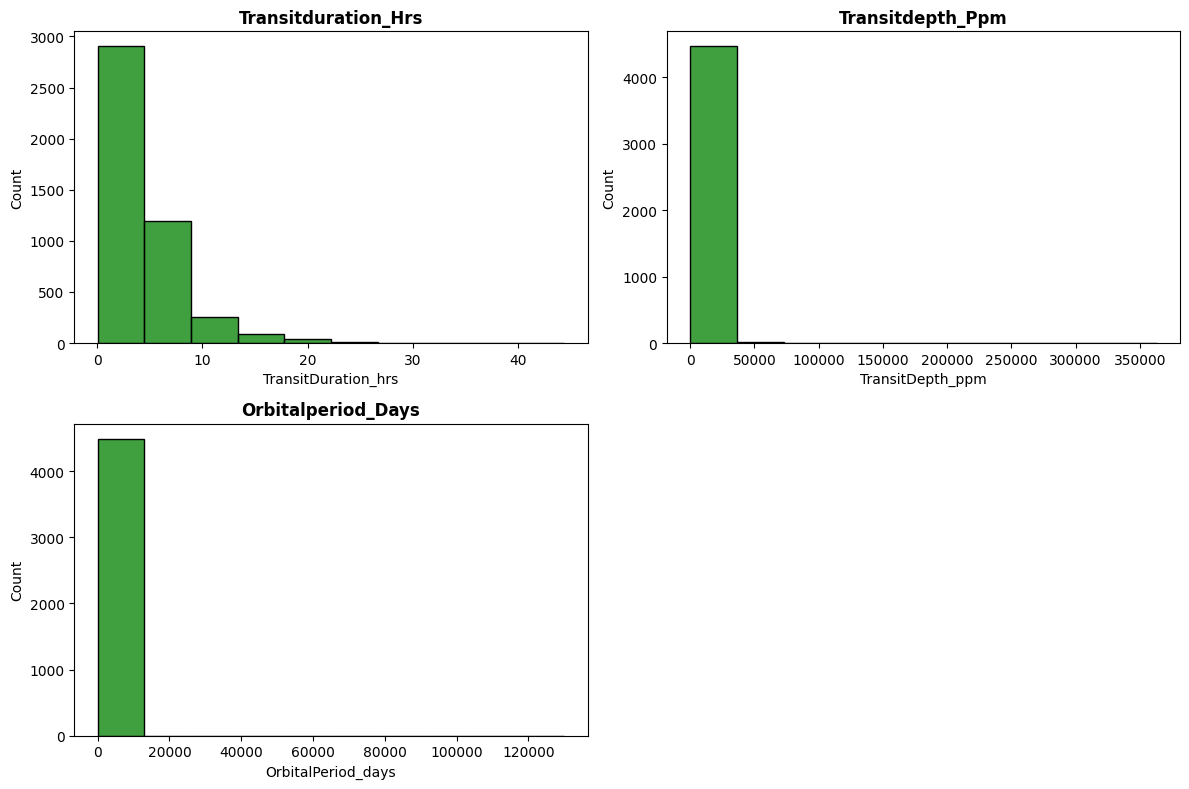

In [22]:
Transit_Properties1=['TransitDuration_hrs','TransitDepth_ppm','OrbitalPeriod_days']

target = [i for i in Transit_Properties1]
plt.figure(figsize=(12,8))
for n,i in enumerate(target):
    plot=plt.subplot(2,2,n+1)
    sns.histplot(Candidate[i],color='green',bins=10)
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

#### Comments:
 1. The Transit duration for most of the candidates is less than 10 hours i.e. transit time is less which implies that possibility of the planet to be gravitationaly bound to it's host star.
 2. For most of the candidate exoplanet the Transit depth is low which signifies low Stellar flux is lost during transit that implies the possibility of the planet to be closely rotating in an orbit to the host star.
 3. Again Less orbital period signifies the candidate planet is at close proximity and is orbiting the host star.

<Axes: xlabel='TransitDepth_ppm', ylabel='TransitDuration_hrs'>

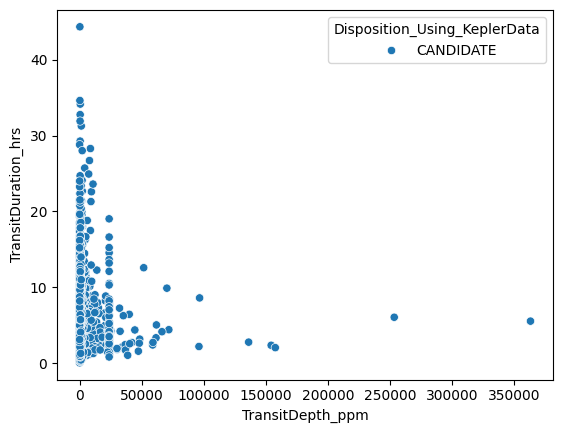

In [23]:
sns.scatterplot(
    x=df['TransitDepth_ppm'],
    y=df['TransitDuration_hrs'],
    hue=Candidate['Disposition_Using_KeplerData'])

- The above plot signifies that the objects that are dispositioned as Candidate have low TransitDepth and TransitDuration.

#### Let us now prospect some attributes that contributed to confirm exoplanets in the Exoplanet_Archive_Disposition.

In [24]:
Confirmed = df[df.Exoplanet_Archive_Disposition == 'CONFIRMED']

<Axes: xlabel='EquilibriumTemperature_K', ylabel='Density'>

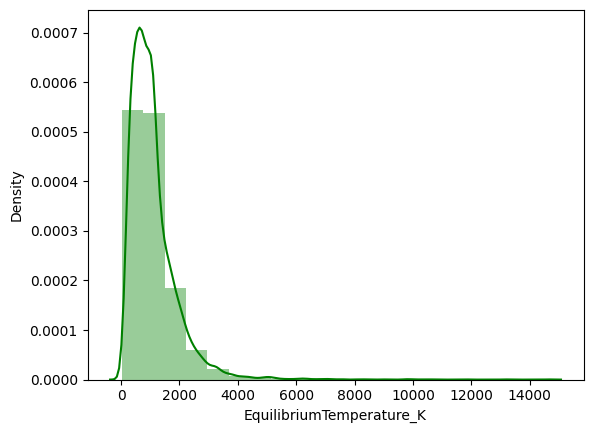

In [34]:
sns.distplot(df['EquilibriumTemperature_K'],color='green',bins=20)

-  for most of the confirmed exoplanets the equilibrium temperature ranges from 0-2000K approximately.

<Axes: xlabel='PlanetaryRadius_Earthradii'>

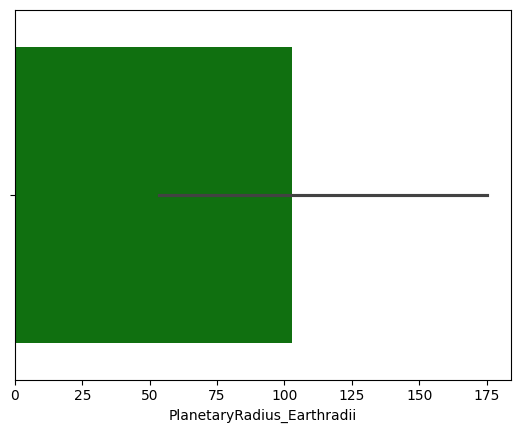

In [27]:
sns.barplot(x=df['PlanetaryRadius_Earthradii'],color='green')

- Most of the confirmed exoplanets has the radius approximately equal to 100 times the earth's radius.

In [28]:
df.columns

Index(['rowid', 'KepID', 'DispositionScore', 'NotTransit_LikeFPFlag',
       'StellarEclipse_FP_Flag', 'CentroidOffsetFPFlag',
       'EphemerisMatchIndicatesContaminationFPFlag', 'OrbitalPeriod_days',
       'OrbitalPeriodUpper_days', 'OrbitalPeriodLower_days',
       'TransitEpoch_BKJD', 'TransitEpoch_Lower', 'TransitEpoch_Upper',
       'ImpactParamete', 'ImpactParameter_Lower', 'ImpactParameter_Upper',
       'TransitDuration_hrs', 'TransitDuration_Lower', 'TransitDuration_Upper',
       'TransitDepth_ppm', 'TransitDepth_Lower', 'TransitDepth_Upper',
       'PlanetaryRadius_Earthradii', 'PlanetaryRadius_Lower',
       'PlanetaryRadius_Upper', 'EquilibriumTemperature_K',
       'InsolationFlux_Earthflux', 'InsolationFlux_Lower',
       'InsolationFlux_Upper', 'TransitSignal_to_Noise', 'TCE_PlanetNumber',
       'StellarEffectiveTemperature_K', 'StellarEffectiveTemp_Lower',
       'StellarEffectiveTemp_Upper', 'StellarSurfaceGravity',
       'Stellar_SurfaceGravity_Lower', 'Stellar_S

##### We are going to drop few more columns.

- 'rowid','KepID','KOIName', as these will not impact model performance.
-  'InsolationFlux_Earthflux','InsolationFlux_Lower','InsolationFlux_Upper', as it is another way to give the equilibrium temperature which is already present.
- 'StellarSurfaceGravity','Stellar_SurfaceGravity_Lower', 'Stellar_SurfaceGravity_Upper', as it's range is quite same for all the object.

In [29]:
#Removing the unnecessary features

df.drop(columns=['KepID','KOIName','InsolationFlux_Earthflux','InsolationFlux_Lower', 'InsolationFlux_Upper','StellarSurfaceGravity','Stellar_SurfaceGravity_Lower', 'Stellar_SurfaceGravity_Upper',],inplace=True)

In [30]:
df.shape

(9564, 38)

In [31]:
df1=df[['DispositionScore','NotTransit_LikeFPFlag', 'StellarEclipse_FP_Flag',
       'CentroidOffsetFPFlag', 'EphemerisMatchIndicatesContaminationFPFlag',
       'OrbitalPeriod_days','TransitEpoch_BKJD','ImpactParamete','TransitDuration_hrs','PlanetaryRadius_Earthradii','EquilibriumTemperature_K',
       'TransitSignal_to_Noise', 'TCE_PlanetNumber','StellarEffectiveTemperature_K','StellarRadius_Solarradii',]]

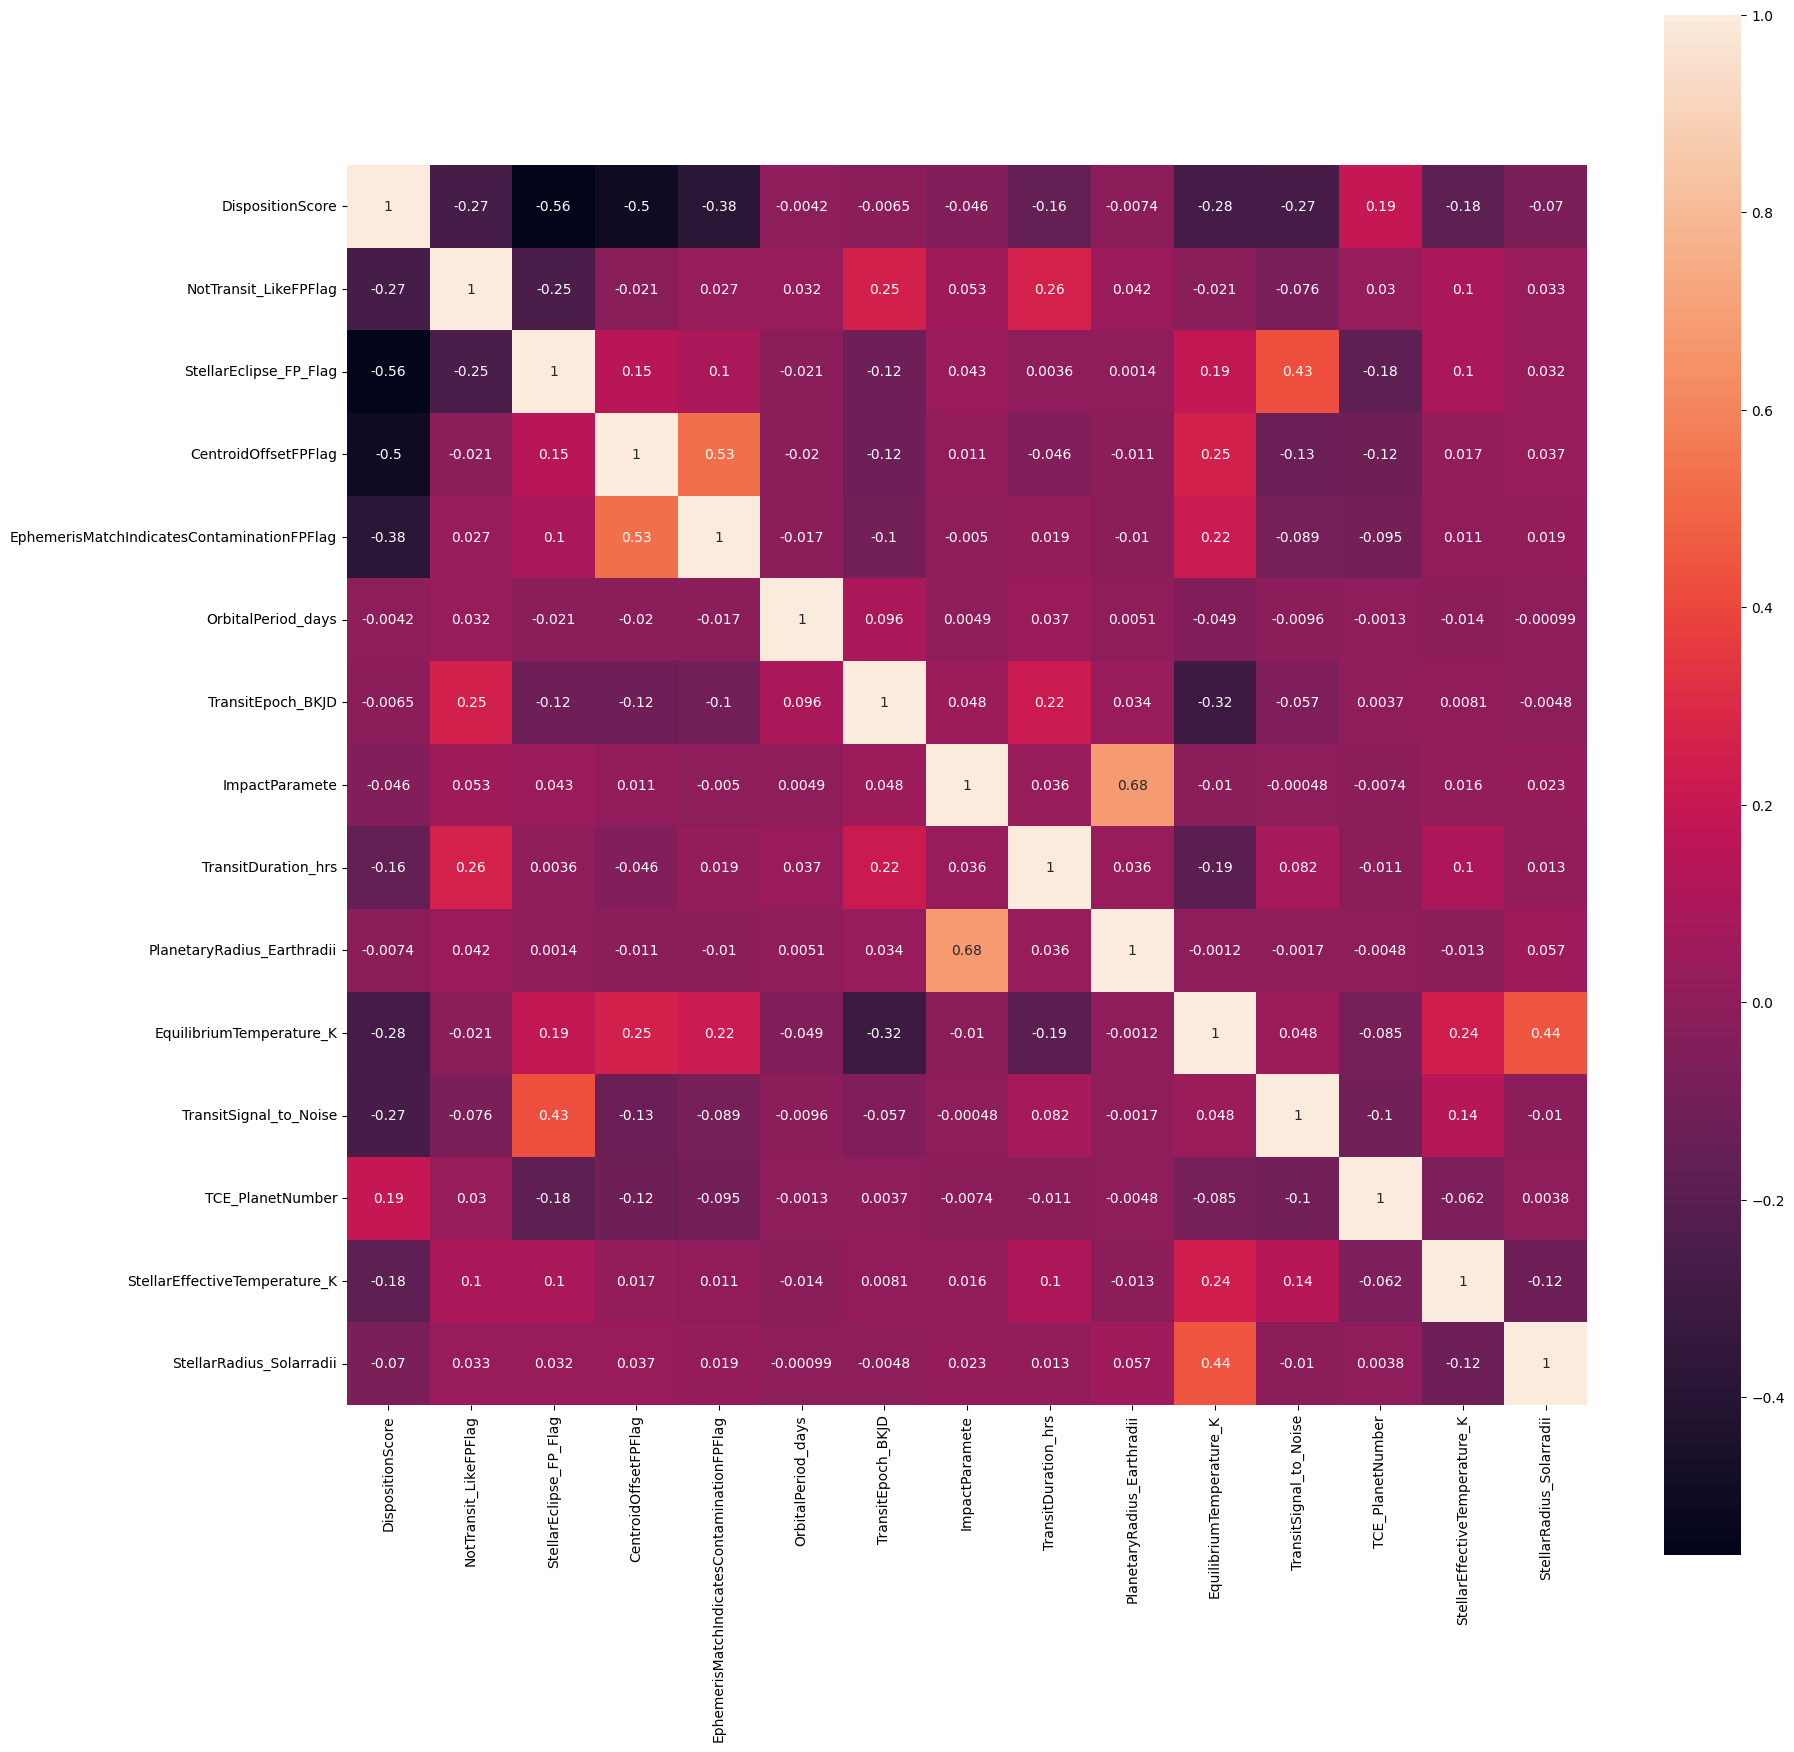

In [32]:
plt.subplots(figsize=(20,20))
sns.heatmap(df1.corr(), square=True,annot=True)
plt.show()

1. **Planetary Radius and Transit Depth are strongly correlated (0.68):**  
   Larger exoplanets block more of their host star’s light during transit, resulting in a deeper transit signal.

2. **Transit Duration and Impact Parameter show a high correlation (0.66):**  
   Transits with higher impact parameters (i.e., more edge-on) tend to be shorter in duration.

3. **Equilibrium Temperature correlates with Stellar Temperature (0.44):**  
   Planets orbiting hotter stars generally have higher equilibrium temperatures due to increased stellar radiation.

#### Comments:
- We can drop 'EphemerisMatchIndicatesContaminationFPFlag' as it is corelated with 'CentroidOffsetFPFlag'. 
- The corelation between all other features is not so high and seems fine to proceed.


In [33]:
df=df.drop('EphemerisMatchIndicatesContaminationFPFlag',axis=1)

# Insights

1. Most detected exoplanets are significantly larger than Earth, approximately 100 times Earth's radius.
2. For most of the confirmed exoplanets the equilibrium temperature ranges from 0-2000K approximately.
3. Candidate have low TransitDepth and TransitDuration.